## 라이브러리 & 패키지 & 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df = pd.read_csv('../Data_file/merge_to_share.csv')
transaction = pd.read_csv('../Data_file/transaction_new.csv')
customer = pd.read_csv('../Data_file/customer.csv')

In [46]:
model_data = pd.read_csv('../Data_file/model.csv')

In [47]:
model_data['target'].value_counts(normalize=True)

target
0    0.777027
1    0.222973
Name: proportion, dtype: float64

## 데이터 전처리&병합

In [50]:
model_data.head()

,Unnamed: 0,customer_id,new_session_id,target,total_amount,shipment_fee,ADD_TO_CART_COUNT,SEARCH_COUNT,ADD_PROMO_COUNT,BOOKING_COUNT,ITEM_DETAIL_COUNT,limit_ship,PAGE_VIEW,total_promo,total_session
0,0,3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5_7952132,1,4,0,2.0,0.0,1.0,1.0,0.0,1,8,3,3
1,1,3,36673b2f-940a-42b5-994d-1cce4796b55f_1792149,0,0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,3
2,2,3,36673b2f-940a-42b5-994d-1cce4796b55f_1792150,0,0,0,2.0,0.0,0.0,0.0,0.0,0,2,0,3
3,3,3,36673b2f-940a-42b5-994d-1cce4796b55f_1792151,0,0,0,1.0,0.0,0.0,0.0,0.0,0,1,0,3
4,4,3,36673b2f-940a-42b5-994d-1cce4796b55f_1792152,1,1,2,0.0,0.0,0.0,1.0,0.0,3,1,0,3


In [49]:
model_data['customer_id'] = model_data['customer_id'].astype(int)

In [3]:
df['customer_id'] = df['customer_id'].astype(int)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589085 entries, 0 to 6589084
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   customer_id      int32  
 2   created_at       object 
 3   first_join_date  object 
 4   new_session_id   object 
 5   diff             object 
 6   target           int64  
 7   event_name       object 
 8   event_time       object 
 9   event_id         object 
 10  traffic_source   object 
 11  product_id       float64
 12  quantity         float64
 13  item_price       float64
 14  payment_status   object 
 15  search_keywords  object 
 16  promo_code       object 
 17  promo_amount     float64
 18  duration_time    object 
 19  session_id       object 
dtypes: float64(4), int32(1), int64(2), object(13)
memory usage: 980.3+ MB


In [5]:
transaction.shape

(1254585, 16)

In [6]:
customer.shape

(100000, 15)

In [51]:
print(f'model : \n {model_data.columns}', '\n')
print(f'merge : \n {df.columns}', '\n')
print(f'transaction : \n {transaction.columns}', '\n')
print(f'customer : \n {customer.columns}', '\n')

model : 
 Index(['Unnamed: 0', 'customer_id', 'new_session_id', 'target', 'total_amount',
       'shipment_fee', 'ADD_TO_CART_COUNT', 'SEARCH_COUNT', 'ADD_PROMO_COUNT',
       'BOOKING_COUNT', 'ITEM_DETAIL_COUNT', 'limit_ship', 'PAGE_VIEW',
       'total_promo', 'total_session'],
      dtype='object') 

merge : 
 Index(['Unnamed: 0', 'customer_id', 'created_at', 'first_join_date',
       'new_session_id', 'diff', 'target', 'event_name', 'event_time',
       'event_id', 'traffic_source', 'product_id', 'quantity', 'item_price',
       'payment_status', 'search_keywords', 'promo_code', 'promo_amount',
       'duration_time', 'session_id'],
      dtype='object') 

transaction : 
 Index(['created_at', 'customer_id', 'booking_id', 'session_id',
       'payment_method', 'payment_status', 'promo_amount', 'promo_code',
       'shipment_fee', 'shipment_date_limit', 'shipment_location_lat',
       'shipment_location_long', 'total_amount', 'product_id', 'quantity',
       'item_price'],
      dtyp

In [52]:
# 고객데이터에서 필요한 컬럼만 추출
df_cus = customer[['customer_id', 'gender', 'birthdate']]

# 생년월일 데이터 datetime으로 변환
df_cus['birthdate'] = pd.to_datetime(df_cus['birthdate'])

# 나이(age) 계산하기 
current_year = datetime.now().year

df_cus['year_of_birth'] = df_cus['birthdate'].dt.year

df_cus['age'] = current_year - df_cus['year_of_birth']

# 연령 그룹 생성
bins = [0, 10, 20, 30, 40, 50, 60, np.inf]
labels = ['10대 이하', '10대', '20대', '30대', '40대', '50대', '60대']
df_cus['age_group'] = pd.cut(df_cus['age'], bins=bins, labels=labels)


df_cus = df_cus[['customer_id', 'gender', 'birthdate', 'age', 'age_group']]
df_cus

,customer_id,gender,birthdate,age,age_group
0,2870,F,1996-06-14,27,20대
1,8193,F,1993-08-16,30,20대
2,7279,M,1989-01-23,34,30대
3,88813,M,1991-01-05,32,30대
4,82542,M,2000-07-15,23,20대
...,...,...,...,...,...
99995,34743,M,2000-11-17,23,20대
99996,72065,M,1998-03-30,25,20대
99997,32818,F,1993-01-12,30,20대
99998,75597,M,2000-09-13,23,20대


In [53]:
df_cus['age_group'].unique()

['20대', '30대', '10대', '40대', '50대', '10대 이하', '60대']
Categories (7, object): ['10대 이하' < '10대' < '20대' < '30대' < '40대' < '50대' < '60대']

In [54]:
model_data.shape

(4345385, 15)

In [55]:
model_data['target'].value_counts(normalize=True)

target
0    0.777027
1    0.222973
Name: proportion, dtype: float64

In [11]:
df_final = pd.merge(df, df_cus, on='customer_id', how='left')

In [12]:
df_final.head()

,Unnamed: 0,customer_id,created_at,first_join_date,new_session_id,diff,target,event_name,event_time,event_id,...,payment_status,search_keywords,promo_code,promo_amount,duration_time,session_id,gender,birthdate,age,age_group
0,0,3,2018-08-25,2018-08-25,f03b6825-1e6e-4916-bf71-f94ecbcbaee5_7952132,24 days,1,HOMEPAGE,2018-08-25 18:53:48.906490+00:00,568d168e-5074-4796-a6c5-21a6a4807690,...,NaN,NaN,NaN,NaN,0 days 00:00:14.938004,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,M,1986-07-12,37,30대
1,1,3,2018-08-25,2018-08-25,f03b6825-1e6e-4916-bf71-f94ecbcbaee5_7952132,24 days,1,CLICK,2018-08-25 18:53:51.906490+00:00,b8d25f7f-c241-4b74-98cc-79417a15d127,...,NaN,NaN,NaN,NaN,0 days 00:00:14.938004,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,M,1986-07-12,37,30대
2,2,3,2018-08-25,2018-08-25,f03b6825-1e6e-4916-bf71-f94ecbcbaee5_7952132,24 days,1,ADD_TO_CART,2018-08-25 18:53:53.906490+00:00,61a64f5d-0eef-4f1e-a871-037e1c2f2fd8,...,NaN,NaN,NaN,NaN,0 days 00:00:14.938004,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,M,1986-07-12,37,30대
3,3,3,2018-08-25,2018-08-25,f03b6825-1e6e-4916-bf71-f94ecbcbaee5_7952132,24 days,1,ADD_TO_CART,2018-08-25 18:53:54.906490+00:00,7ec8e805-5825-4009-b215-4199c47880be,...,NaN,NaN,NaN,NaN,0 days 00:00:14.938004,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,M,1986-07-12,37,30대
4,4,3,2018-08-25,2018-08-25,f03b6825-1e6e-4916-bf71-f94ecbcbaee5_7952132,24 days,1,CLICK,2018-08-25 18:53:55.906490+00:00,54411940-007b-4159-a2ca-ada19b3f42ab,...,NaN,NaN,NaN,NaN,0 days 00:00:14.938004,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,M,1986-07-12,37,30대


In [13]:
df_final.isna().sum()

Unnamed: 0               0
customer_id              0
created_at               0
first_join_date          0
new_session_id           0
diff                     0
target                   0
event_name               0
event_time               0
event_id                 0
traffic_source           0
product_id         5514018
quantity           5514018
item_price         5514018
payment_status     6014202
search_keywords    6073467
promo_code         6412912
promo_amount       6412912
duration_time            0
session_id               0
gender                   0
birthdate                0
age                      0
age_group                0
dtype: int64

## 이탈 분석

### 성별 분석

In [44]:
df_final['target'].value_counts(normalize=True)

target
0    0.696648
1    0.303352
Name: proportion, dtype: float64

In [14]:
df_final[df_final['customer_id'] == 3]['target'].mean() * 100

15.632754342431761

In [15]:
df_final['customer_id'].nunique()

40389

In [16]:
# 고객별 이탈 세션 수와 전체 세션 수 계산
customer_churn = df_final.groupby('customer_id')['target'].agg(['sum', 'count'])

# 이탈률 계산
customer_churn['churn_rate'] = customer_churn['sum'] / customer_churn['count']

# 이탈률이 높은 순으로 고객 정렬
customer_churn_sorted = customer_churn.sort_values('churn_rate', ascending=False)

# 결과 출력
print(customer_churn_sorted)




             sum  count  churn_rate
customer_id                        
68271         40     40         1.0
67980         33     33         1.0
67888         37     37         1.0
39739         52     52         1.0
39721         38     38         1.0
...          ...    ...         ...
21705          0     46         0.0
67580          0   1068         0.0
21772          0    133         0.0
21796          0   2340         0.0
37584          0    287         0.0

[40389 rows x 3 columns]


In [17]:
customer_churn_sorted.loc[3]


sum            63.000000
count         403.000000
churn_rate      0.156328
Name: 3, dtype: float64

In [18]:
customer_churn_sorted

,sum,count,churn_rate
customer_id,,,
68271,40,40,1.0
67980,33,33,1.0
67888,37,37,1.0
39739,52,52,1.0
39721,38,38,1.0
...,...,...,...
21705,0,46,0.0
67580,0,1068,0.0
21772,0,133,0.0


In [19]:
customer_churn_sorted.describe()

,sum,count,churn_rate
count,40389.000000,40389.000000,40389.000000
mean,49.488970,163.140583,0.449898
std,59.431917,221.170050,0.273403
min,0.000000,1.000000,0.000000
25%,17.000000,36.000000,0.250000
50%,32.000000,84.000000,0.365854
75%,57.000000,199.000000,0.606742
max,769.000000,4194.000000,1.000000


In [56]:
# 이탈률이 높은 고객의 성별 비율 계산
high_churn_customers = customer_churn_sorted[customer_churn_sorted['churn_rate'] > 0.35].index
high_churn_gender_ratio = df_final[df_final['customer_id'].isin(high_churn_customers)].groupby('customer_id')['gender'].first().value_counts(normalize=True)


# 결과 출력
print(high_churn_gender_ratio)

gender
F    0.641672
M    0.358328
Name: proportion, dtype: float64


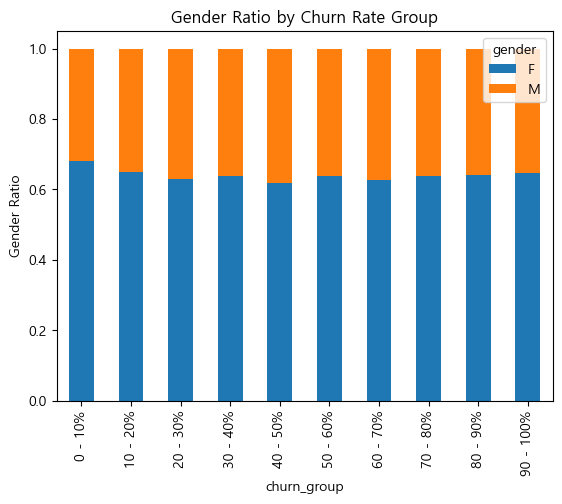

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 이탈율에 따라 고객을 분류
bins = np.linspace(-0.01, 1, 11)  # 이탈률 그룹의 경계값, 시작점 -0.01로 설정
labels = [f'{i * 10} - {(i + 1) * 10}%' for i in range(10)]  # 각 그룹의 레이블
labels[-1] = '90 - 100%'  # 마지막 구간 레이블을 '90 - 100%'로 설정
customer_churn_sorted['churn_group'] = pd.cut(customer_churn_sorted['churn_rate'], bins=bins, labels=labels)




# 각 그룹에서의 성별 비율 계산
gender_ratio_by_churn_group = df_final.groupby(['customer_id', 'gender']).size().unstack().fillna(0)
gender_ratio_by_churn_group['churn_group'] = customer_churn_sorted['churn_group']
gender_ratio_by_churn_group = gender_ratio_by_churn_group.groupby('churn_group').sum()
gender_ratio_by_churn_group = gender_ratio_by_churn_group.div(gender_ratio_by_churn_group.sum(axis=1), axis=0)

# 막대그래프로 시각화
gender_ratio_by_churn_group.plot(kind='bar', stacked=True)
plt.ylabel('Gender Ratio')
plt.title('Gender Ratio by Churn Rate Group')
plt.show()


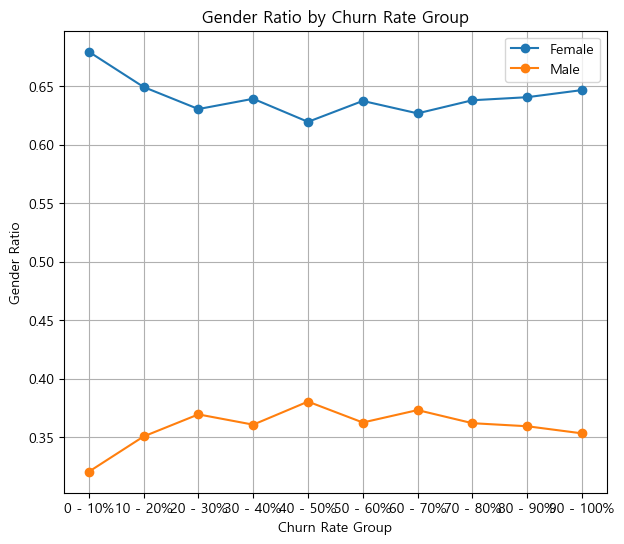

In [22]:
import matplotlib.pyplot as plt

# 각 성별에 대해 이탈률 그룹별 비율을 계산합니다.
gender_ratio_by_churn_group['F_ratio'] = gender_ratio_by_churn_group['F'] / (gender_ratio_by_churn_group['F'] + gender_ratio_by_churn_group['M'])
gender_ratio_by_churn_group['M_ratio'] = gender_ratio_by_churn_group['M'] / (gender_ratio_by_churn_group['F'] + gender_ratio_by_churn_group['M'])

# 성별 비율을 선 그래프로 그립니다.
plt.figure(figsize=(7,6))
plt.plot(gender_ratio_by_churn_group.index, gender_ratio_by_churn_group['F_ratio'], marker='o', label='Female')
plt.plot(gender_ratio_by_churn_group.index, gender_ratio_by_churn_group['M_ratio'], marker='o', label='Male')
plt.xlabel('Churn Rate Group')
plt.ylabel('Gender Ratio')
plt.title('Gender Ratio by Churn Rate Group')
plt.legend()
plt.grid(True)
plt.show()


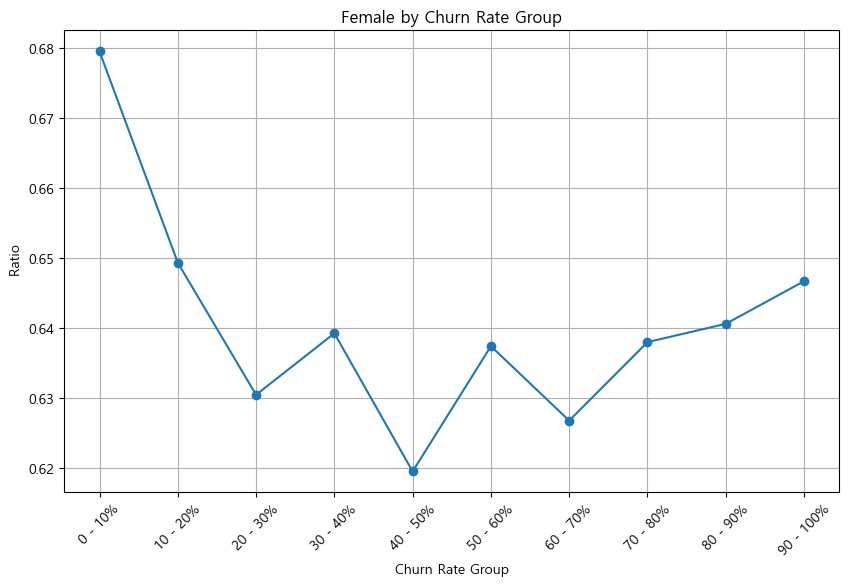

In [23]:
import matplotlib.pyplot as plt

# 각 성별에 대해 이탈률 그룹별 비율을 계산합니다.
gender_ratio_by_churn_group['F_ratio'] = gender_ratio_by_churn_group['F'] / (gender_ratio_by_churn_group['F'] + gender_ratio_by_churn_group['M'])

# 성별 비율을 선 그래프로 그립니다.
plt.figure(figsize=(10,6))
plt.plot(gender_ratio_by_churn_group.index, gender_ratio_by_churn_group['F_ratio'], marker='o', label='Female')
plt.xticks(rotation=45)
plt.xlabel('Churn Rate Group')
plt.ylabel(' Ratio')
plt.title('Female by Churn Rate Group')
plt.grid(True)
plt.show()

In [24]:
customer_churn_sorted

,sum,count,churn_rate,churn_group
customer_id,,,,
68271,40,40,1.0,90 - 100%
67980,33,33,1.0,90 - 100%
67888,37,37,1.0,90 - 100%
39739,52,52,1.0,90 - 100%
39721,38,38,1.0,90 - 100%
...,...,...,...,...
21705,0,46,0.0,0 - 10%
67580,0,1068,0.0,0 - 10%
21772,0,133,0.0,0 - 10%


#### 연령대 분석

In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589085 entries, 0 to 6589084
Data columns (total 24 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Unnamed: 0       int64         
 1   customer_id      int32         
 2   created_at       object        
 3   first_join_date  object        
 4   new_session_id   object        
 5   diff             object        
 6   target           int64         
 7   event_name       object        
 8   event_time       object        
 9   event_id         object        
 10  traffic_source   object        
 11  product_id       float64       
 12  quantity         float64       
 13  item_price       float64       
 14  payment_status   object        
 15  search_keywords  object        
 16  promo_code       object        
 17  promo_amount     float64       
 18  duration_time    object        
 19  session_id       object        
 20  gender           object        
 21  birthdate        datetime64[ns]

In [26]:
# 이탈률이 높은 고객 ID 리스트
high_churn_customers = customer_churn_sorted[customer_churn_sorted['churn_rate'] > 0.5].index

# 이탈률이 높은 고객들의 데이터만 선택
high_churn_df = df_final[df_final['customer_id'].isin(high_churn_customers)]

# 이탈률이 높은 고객들의 나이 분포 확인
age_distribution = high_churn_df['age'].value_counts().sort_index()
print(age_distribution)

# 이탈률이 높은 고객들의 연령대 분포 확인
age_group_distribution = high_churn_df['age_group'].value_counts().sort_index()
print(age_group_distribution)


age
7       102
8        63
9        60
10      401
11      701
12     1812
13     2132
14     4480
15     6054
16     8095
17    12121
18    15081
19    20539
20    26020
21    28823
22    28769
23    31204
24    36051
25    37663
26    32334
27    30647
28    29649
29    33054
30    28105
31    24791
32    24080
33    19367
34    18390
35    15595
36    12871
37    13018
38     8700
39    10273
40     6363
41     5219
42     4907
43     4249
44     2938
45     2333
46     2027
47     1516
48     1431
49     1046
50      712
51      386
52      719
53      352
54      247
55      352
56      121
57       84
58      185
59      138
60       41
61       67
Name: count, dtype: int64
age_group
10대 이하       626
10대        97035
20대       316299
30대       153448
40대        26378
50대         2625
60대           67
Name: count, dtype: int64


In [27]:
# 이탈률이 높은 고객들의 데이터 중 중복된 고객 ID를 제거
unique_high_churn_df = high_churn_df.drop_duplicates(subset=['customer_id', 'age', 'age_group'])

# 이탈률이 높은 고객들의 나이 분포 확인
age_distribution = unique_high_churn_df['age'].value_counts().sort_index()
print(age_distribution)

# 이탈률이 높은 고객들의 연령대 분포 확인
age_group_distribution = unique_high_churn_df['age_group'].value_counts().sort_index()
print(age_group_distribution)


age
7       1
8       2
9       1
10      9
11     17
12     41
13     58
14    102
15    122
16    185
17    277
18    355
19    469
20    556
21    611
22    644
23    676
24    747
25    801
26    709
27    728
28    702
29    686
30    625
31    527
32    524
33    474
34    395
35    362
36    308
37    282
38    215
39    215
40    165
41    142
42     96
43     92
44     75
45     61
46     51
47     41
48     30
49     21
50     16
51     12
52     14
53      7
54      7
55      7
56      4
57      1
58      2
59      2
60      2
61      2
Name: count, dtype: int64
age_group
10대 이하      13
10대       2182
20대       6929
30대       3467
40대        625
50대         58
60대          2
Name: count, dtype: int64


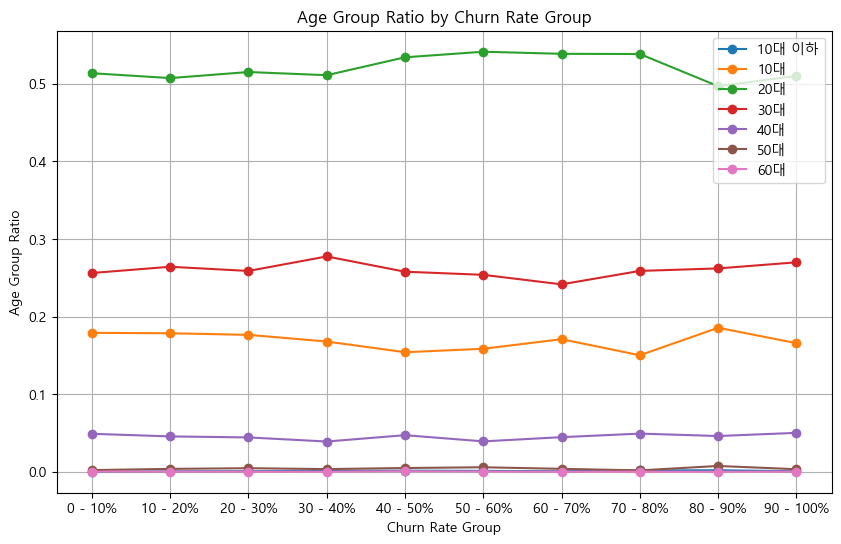

In [28]:
# 각 그룹에서의 연령대 비율 계산
age_group_ratio_by_churn_group = df_final.groupby(['customer_id', 'age_group']).size().unstack().fillna(0)
age_group_ratio_by_churn_group['churn_group'] = customer_churn_sorted['churn_group']
age_group_ratio_by_churn_group = age_group_ratio_by_churn_group.groupby('churn_group').sum()
age_group_ratio_by_churn_group = age_group_ratio_by_churn_group.div(age_group_ratio_by_churn_group.sum(axis=1), axis=0)

# 연령대 비율을 선 그래프로 그립니다.
plt.figure(figsize=(10,6))

for age_group in age_group_ratio_by_churn_group.columns:
    if age_group != 'churn_group':
        plt.plot(age_group_ratio_by_churn_group.index, age_group_ratio_by_churn_group[age_group], marker='o', label=age_group)

plt.xlabel('Churn Rate Group')
plt.ylabel('Age Group Ratio')
plt.title('Age Group Ratio by Churn Rate Group')
plt.legend(loc='best')
plt.grid(True)
plt.show()




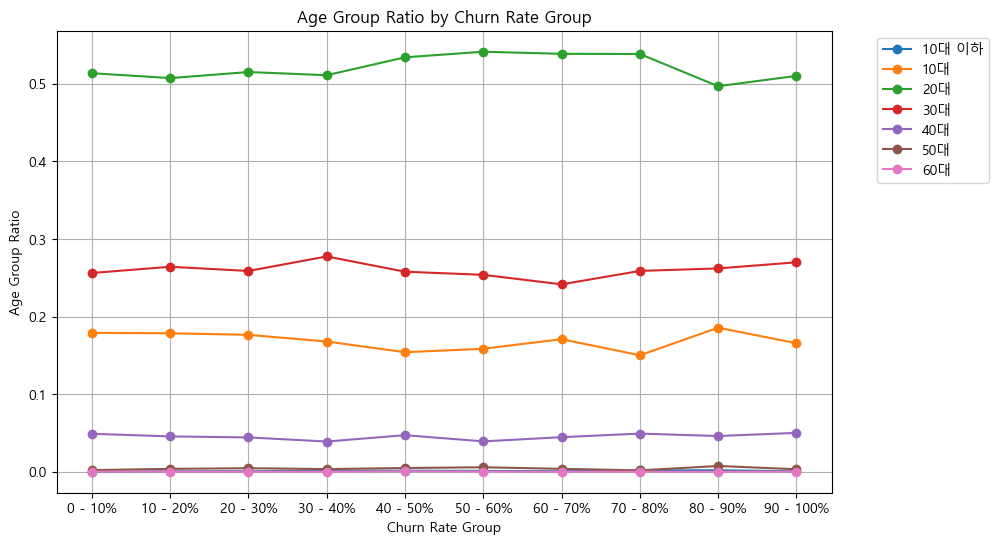

In [29]:
plt.figure(figsize=(10,6))

for age_group in age_group_ratio_by_churn_group.columns:
    if age_group != 'churn_group':
        plt.plot(age_group_ratio_by_churn_group.index, age_group_ratio_by_churn_group[age_group], marker='o', label=age_group)

plt.xlabel('Churn Rate Group')
plt.ylabel('Age Group Ratio')
plt.title('Age Group Ratio by Churn Rate Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례를 그래프 밖으로 이동
plt.grid(True)
plt.show()


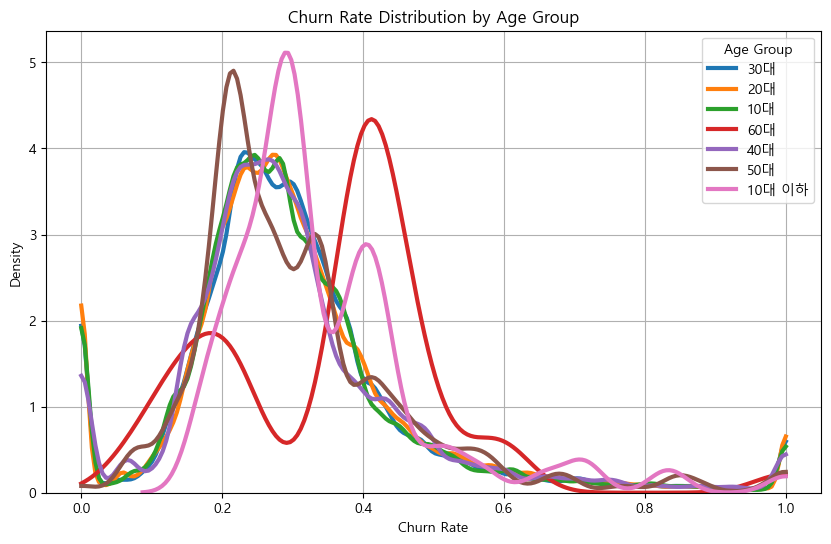

In [30]:
import seaborn as sns

# 각 연령대에서의 이탈률을 구하기 위해 원본 데이터와 고객별 이탈률을 병합합니다.
df_final_with_churn_rate = df_final.merge(customer_churn_sorted['churn_rate'], left_on='customer_id', right_index=True)

# 연령대 그룹을 반복하면서 각 그룹의 이탈률 분포를 시각화합니다.
plt.figure(figsize=(10,6))
for age_group in df_final['age_group'].unique():
    subset = df_final_with_churn_rate[df_final_with_churn_rate['age_group'] == age_group]
    sns.distplot(subset['churn_rate'], hist = False, kde = True, kde_kws = {'linewidth': 3, 'clip': (0.0, 1.0)}, label = age_group)


plt.xlabel('Churn Rate')
plt.ylabel('Density')
plt.title('Churn Rate Distribution by Age Group')
plt.legend(title = 'Age Group')
plt.grid(True)
plt.show()


In [31]:
# 각 연령대에서의 평균 이탈률 계산
average_churn_rate_by_age_group = df_final_with_churn_rate.groupby('age_group')['churn_rate'].mean()

print(average_churn_rate_by_age_group)

age_group
10대 이하    0.350867
10대       0.298798
20대       0.304714
30대       0.303514
40대       0.302261
50대       0.312263
60대       0.362184
Name: churn_rate, dtype: float64


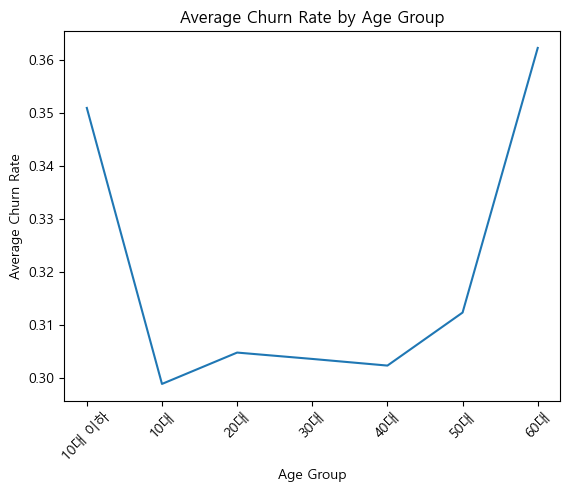

In [32]:
# 각 연령대에서의 평균 이탈률 계산
average_churn_rate_by_age_group = df_final_with_churn_rate.groupby('age_group')['churn_rate'].mean()

# 평균 이탈률을 그래프로 그립니다.
average_churn_rate_by_age_group.plot(kind='line')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Average Churn Rate')
plt.title('Average Churn Rate by Age Group')
plt.show()


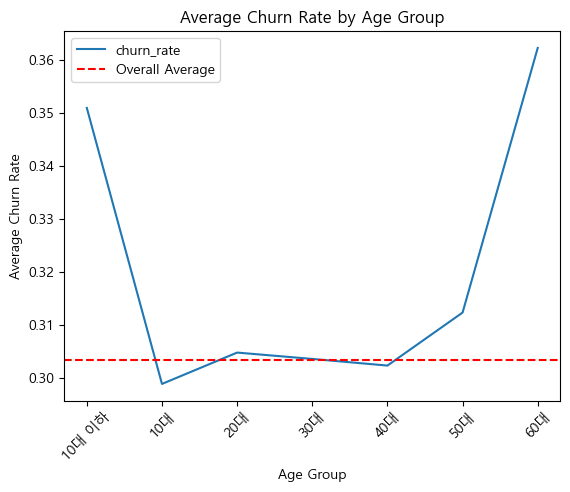

In [33]:
average_churn_rate_by_age_group = df_final_with_churn_rate.groupby('age_group')['churn_rate'].mean()

# 전체 평균 이탈률 계산
overall_average_churn_rate = df_final_with_churn_rate['churn_rate'].mean()

# 평균 이탈률을 그래프로 그립니다.
average_churn_rate_by_age_group.plot(kind='line')
plt.xticks(rotation=45)

# 전체 평균 이탈률 선 추가
plt.axhline(y=overall_average_churn_rate, color='r', linestyle='--', label='Overall Average')

plt.xlabel('Age Group')
plt.ylabel('Average Churn Rate')
plt.title('Average Churn Rate by Age Group')
plt.legend()
plt.show()


In [41]:
overall_average_churn_rate

0.3033516793302864

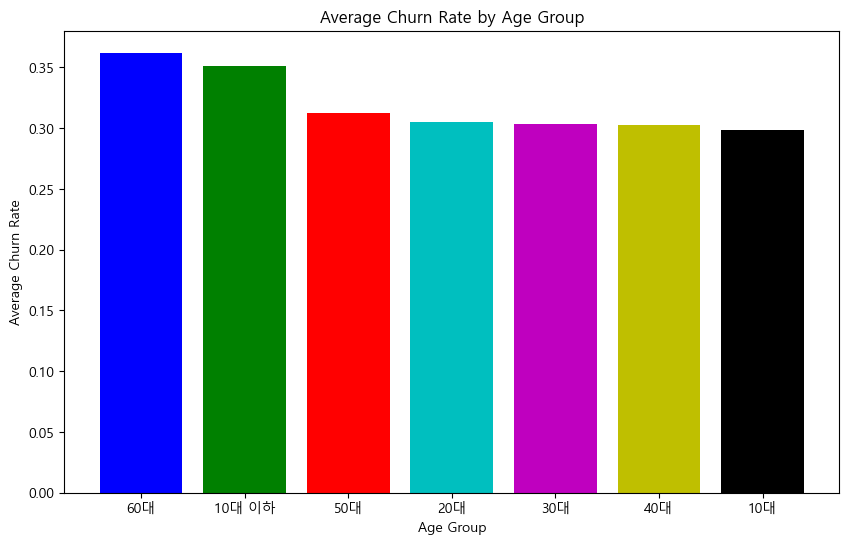

In [34]:
# 각 연령대에서의 평균 이탈률 계산
average_churn_rate_by_age_group = df_final_with_churn_rate.groupby('age_group')['churn_rate'].mean().sort_values(ascending=False)

# 색상 리스트 생성 (색상 수는 연령 그룹 수와 일치해야 합니다.)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize=(10,6))

# 각 연령 그룹에 대해 막대 그래프 그리기
for i, age_group in enumerate(average_churn_rate_by_age_group.index):
    plt.bar(age_group, average_churn_rate_by_age_group[age_group], color=colors[i])

plt.xlabel('Age Group')
plt.ylabel('Average Churn Rate')
plt.title('Average Churn Rate by Age Group')
plt.show()


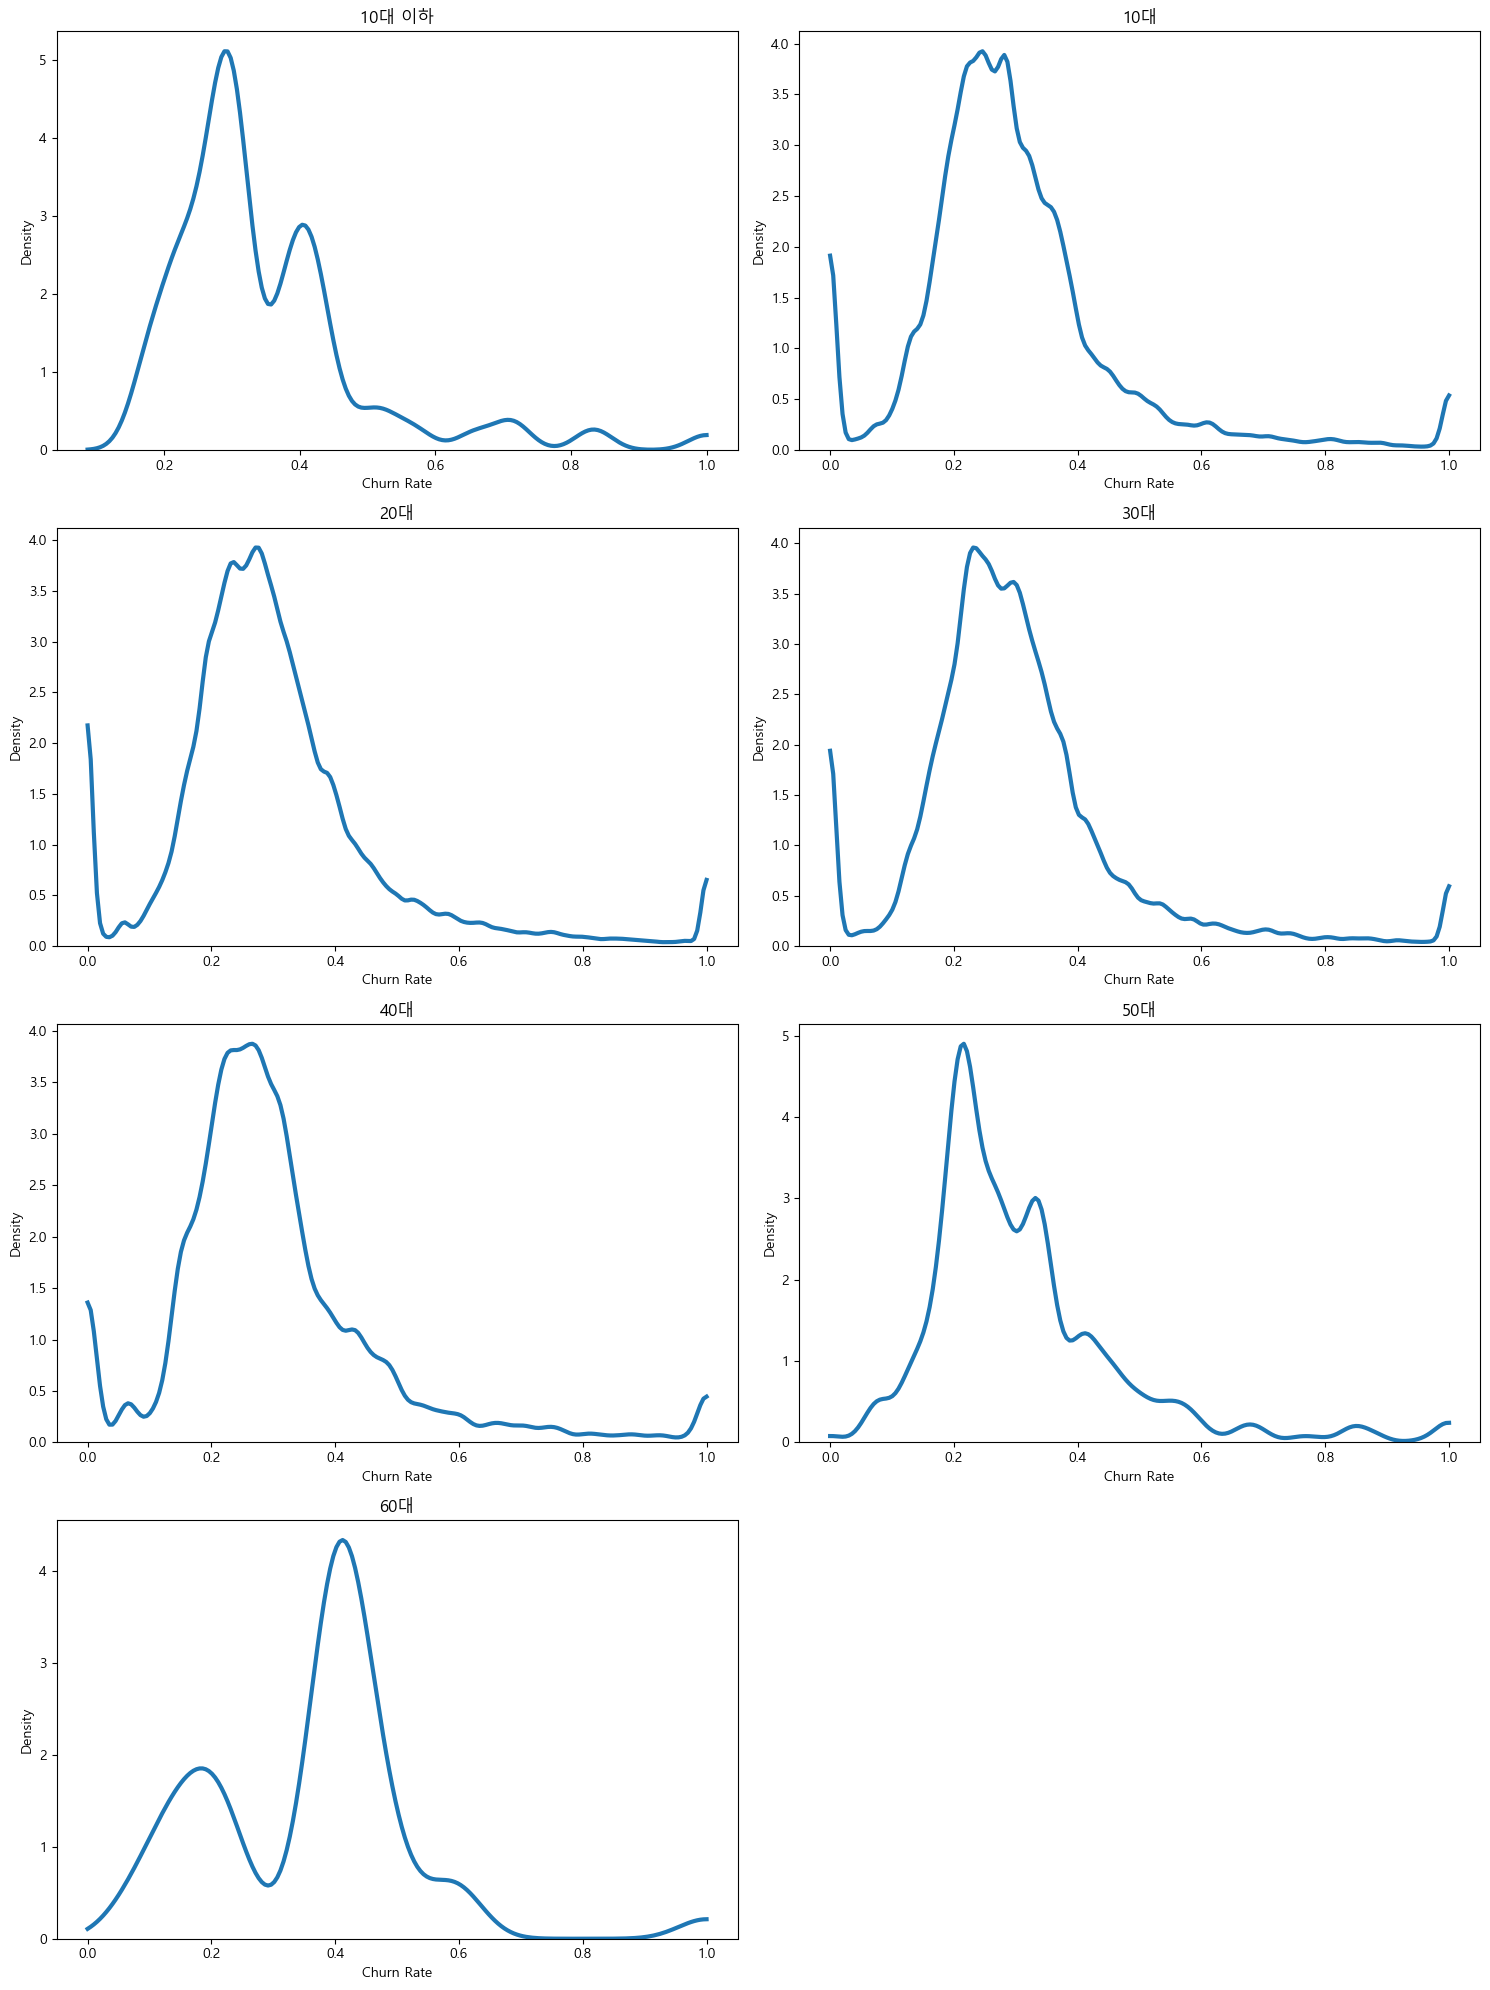

In [35]:
# 연령 그룹의 개수를 구하고, 이를 바탕으로 subplot의 row와 column을 설정합니다.
n_age_groups = df_final['age_group'].nunique()
n_cols = 2
n_rows = n_age_groups // n_cols
n_rows += n_age_groups % n_cols

pos = range(1, n_age_groups + 1)

plt.figure(figsize=(15, 5 * n_rows))

for i, age_group in enumerate(df_final['age_group'].sort_values().unique()):
    plt.subplot(n_rows, n_cols, pos[i])
    subset = df_final_with_churn_rate[df_final_with_churn_rate['age_group'] == age_group]
    sns.distplot(subset['churn_rate'], hist=False, kde=True, 
                 kde_kws={'linewidth': 3, 'clip': (0.0, 1.0)})
    plt.title(age_group)
    plt.xlabel('Churn Rate')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()



In [36]:
df_final['age_group'].sort_values().unique()

['10대 이하', '10대', '20대', '30대', '40대', '50대', '60대']
Categories (7, object): ['10대 이하' < '10대' < '20대' < '30대' < '40대' < '50대' < '60대']

In [37]:
df_final_with_churn_rate[df_final_with_churn_rate['age_group'] == '10대 이하']

,Unnamed: 0,customer_id,created_at,first_join_date,new_session_id,diff,target,event_name,event_time,event_id,...,search_keywords,promo_code,promo_amount,duration_time,session_id,gender,birthdate,age,age_group,churn_rate
265364,265364,3902,2020-06-24,2020-06-24,ffc83f8a-6312-438f-8b2d-ad8652333dbb_8462484,69 days,1,HOMEPAGE,2020-06-24 14:02:17.486346+00:00,0376d403-94cc-42c2-be59-4e245e51c1c6,...,NaN,NaN,NaN,0 days 00:05:07.832800,ffc83f8a-6312-438f-8b2d-ad8652333dbb,F,2013-07-30,10,10대 이하,0.390625
265365,265365,3902,2020-06-24,2020-06-24,ffc83f8a-6312-438f-8b2d-ad8652333dbb_8462484,69 days,1,SCROLL,2020-06-24 14:02:36.486346+00:00,2e8b9b89-3624-4265-aed0-509e269ba190,...,NaN,NaN,NaN,0 days 00:05:07.832800,ffc83f8a-6312-438f-8b2d-ad8652333dbb,F,2013-07-30,10,10대 이하,0.390625
265366,265366,3902,2020-06-24,2020-06-24,ffc83f8a-6312-438f-8b2d-ad8652333dbb_8462484,69 days,1,ADD_TO_CART,2020-06-24 14:02:37.486346+00:00,158a37a2-b6e1-41f8-8350-ead4a87881a1,...,NaN,NaN,NaN,0 days 00:05:07.832800,ffc83f8a-6312-438f-8b2d-ad8652333dbb,F,2013-07-30,10,10대 이하,0.390625
265367,265367,3902,2020-06-24,2020-06-24,ffc83f8a-6312-438f-8b2d-ad8652333dbb_8462484,69 days,1,SEARCH,2020-06-24 14:03:04.486346+00:00,ab893b96-c213-41e9-a44d-9b697111df54,...,Kaos,NaN,NaN,0 days 00:05:07.832800,ffc83f8a-6312-438f-8b2d-ad8652333dbb,F,2013-07-30,10,10대 이하,0.390625
265368,265368,3902,2020-06-24,2020-06-24,ffc83f8a-6312-438f-8b2d-ad8652333dbb_8462484,69 days,1,ADD_TO_CART,2020-06-24 14:03:26.486346+00:00,05e353d7-e385-49eb-b7a2-8563bf15b615,...,NaN,NaN,NaN,0 days 00:05:07.832800,ffc83f8a-6312-438f-8b2d-ad8652333dbb,F,2013-07-30,10,10대 이하,0.390625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6589080,6589080,99998,2022-01-07,2018-07-01,4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625124,1 days,0,ADD_TO_CART,2022-01-07 03:12:05.703960+00:00,b1f530b8-224a-4c2b-908d-931eab5f43e4,...,NaN,NaN,NaN,0 days 00:00:00,4fc4d81b-4b29-4aef-bd1f-263c373950d1,F,2014-05-21,9,10대 이하,0.168000
6589081,6589081,99998,2022-01-08,2018-07-01,4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625125,1 days,0,ADD_TO_CART,2022-01-08 12:17:08.703960+00:00,f38eea9d-789a-4b8e-93f2-9afa34881321,...,NaN,NaN,NaN,0 days 00:00:00,4fc4d81b-4b29-4aef-bd1f-263c373950d1,F,2014-05-21,9,10대 이하,0.168000
6589082,6589082,99998,2022-01-09,2018-07-01,4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625126,2 days,0,ADD_TO_CART,2022-01-09 21:21:48.703960+00:00,c4eea943-6222-4410-8548-6daada62e353,...,NaN,NaN,NaN,0 days 00:00:00,4fc4d81b-4b29-4aef-bd1f-263c373950d1,F,2014-05-21,9,10대 이하,0.168000
6589083,6589083,99998,2022-01-11,2018-07-01,4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625127,1 days,0,ADD_TO_CART,2022-01-11 06:21:00.703960+00:00,d77d62e3-d533-47cb-bd79-73935ac3b964,...,NaN,NaN,NaN,0 days 00:00:00,4fc4d81b-4b29-4aef-bd1f-263c373950d1,F,2014-05-21,9,10대 이하,0.168000


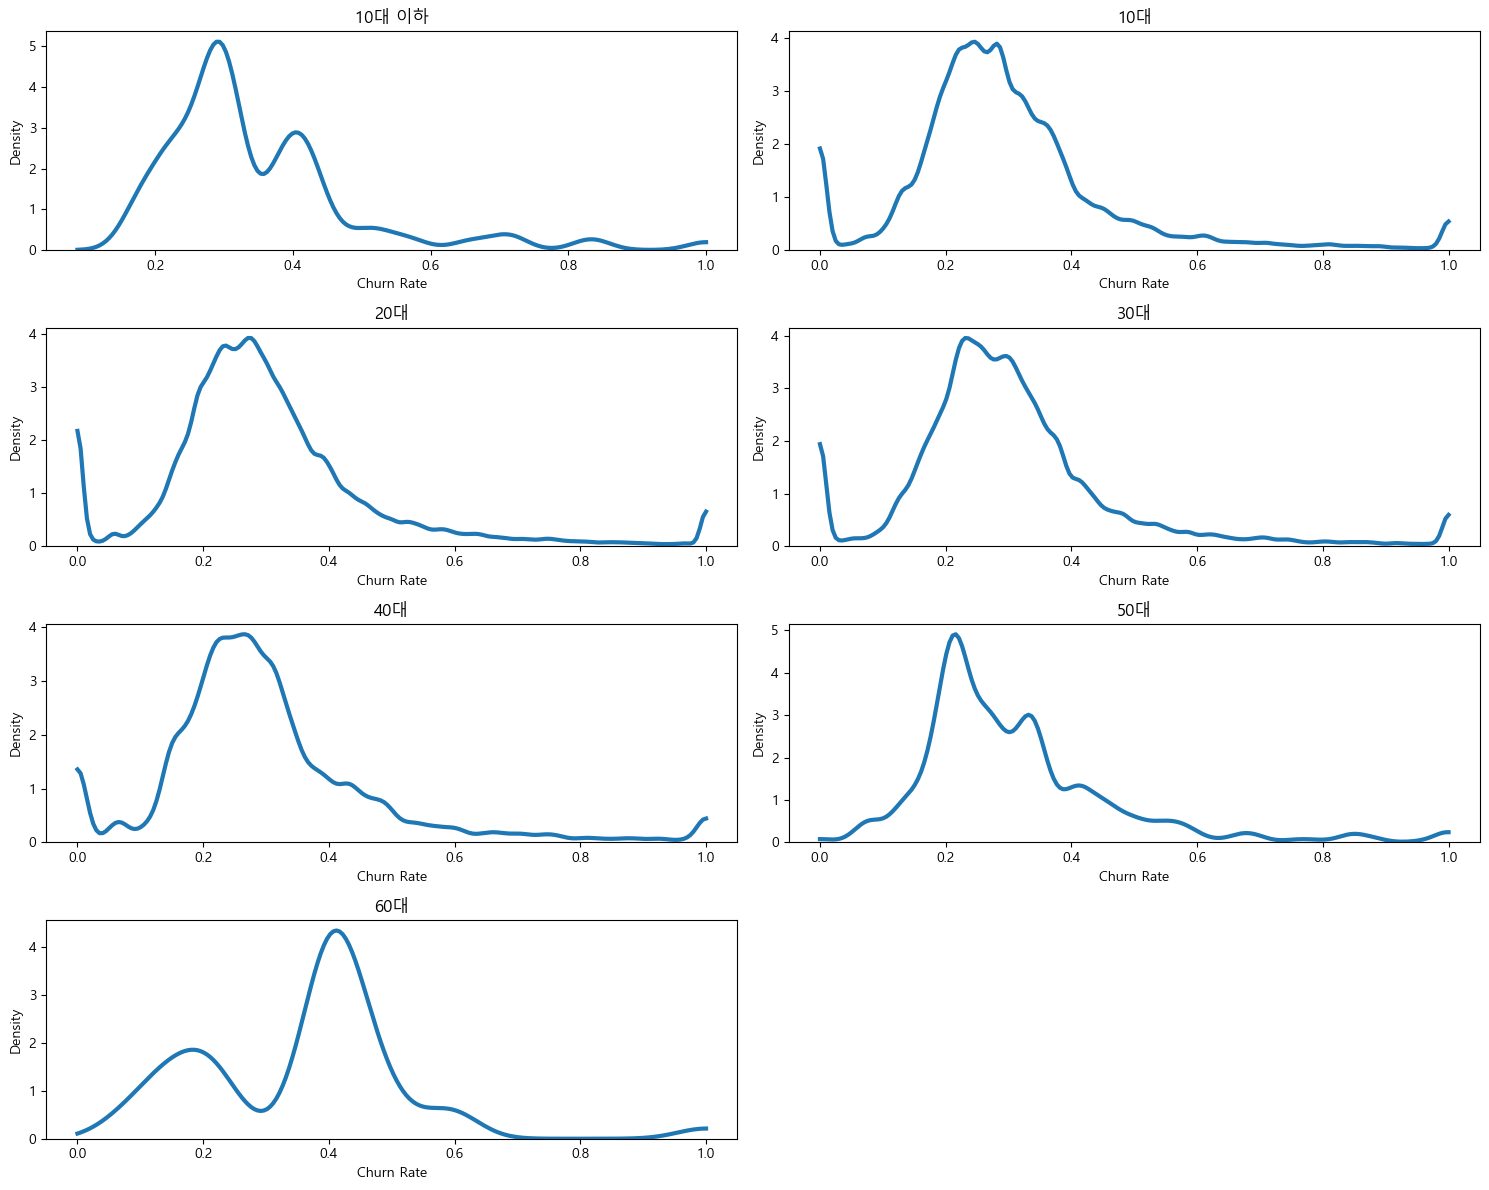

In [38]:
# 연령 그룹의 개수를 구하고, 이를 바탕으로 subplot의 row와 column을 설정합니다.
n_age_groups = df_final['age_group'].nunique()
n_cols = 2
n_rows = n_age_groups // n_cols
n_rows += n_age_groups % n_cols

pos = range(1, n_age_groups + 1)

plt.figure(figsize=(15, 3 * n_rows))

for i, age_group in enumerate(df_final['age_group'].sort_values().unique()):
    plt.subplot(n_rows, n_cols, pos[i])
    subset = df_final_with_churn_rate[df_final_with_churn_rate['age_group'] == age_group]
    sns.distplot(subset['churn_rate'], hist=False, kde=True, 
                 kde_kws={'linewidth': 3, 'clip': (0.0, 1.0)})
    plt.title(age_group)
    plt.xlabel('Churn Rate')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


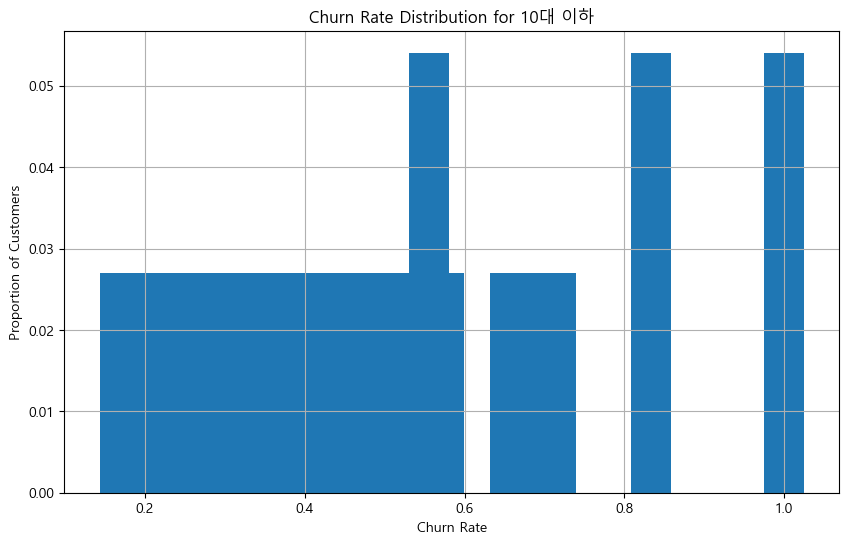

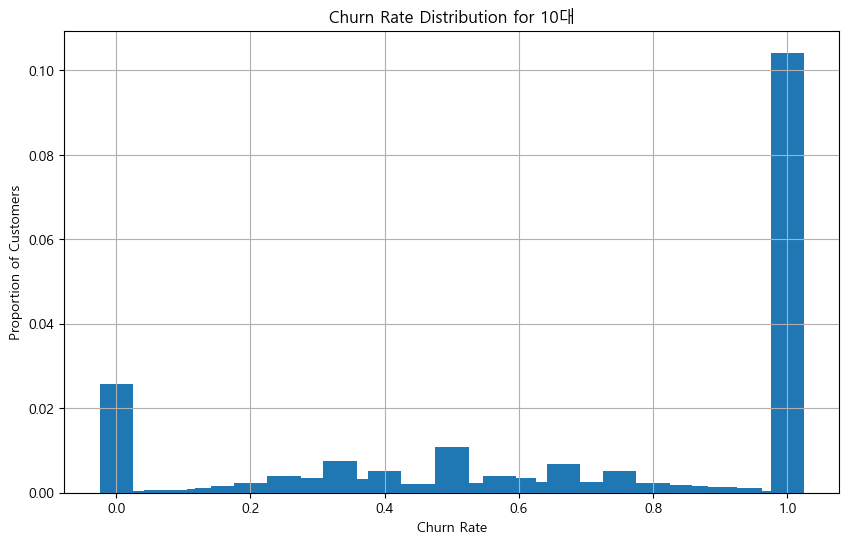

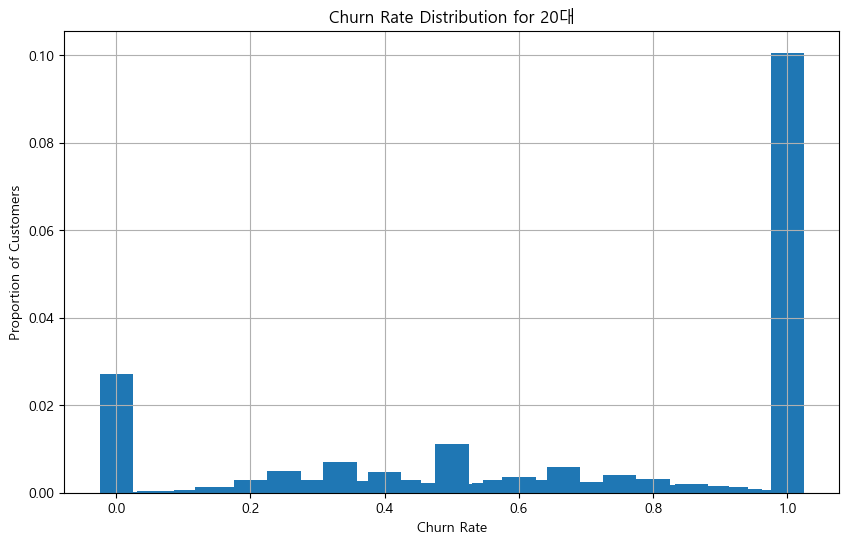

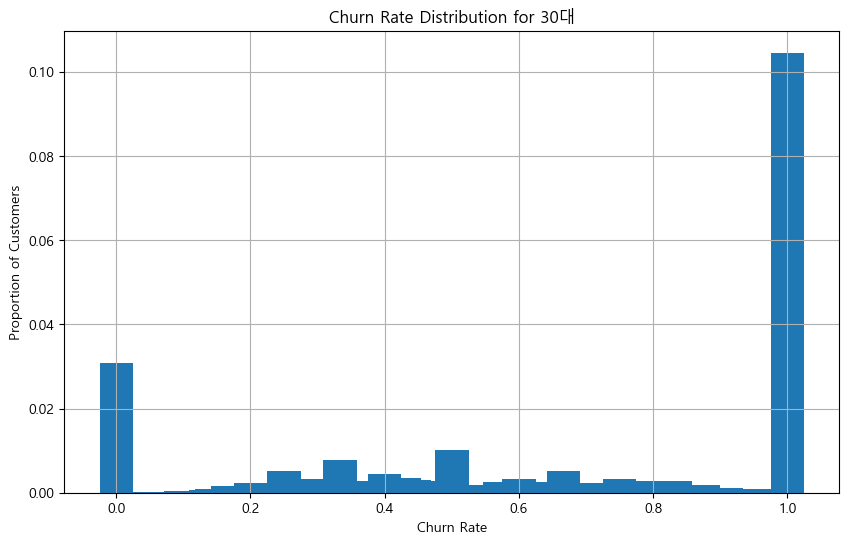

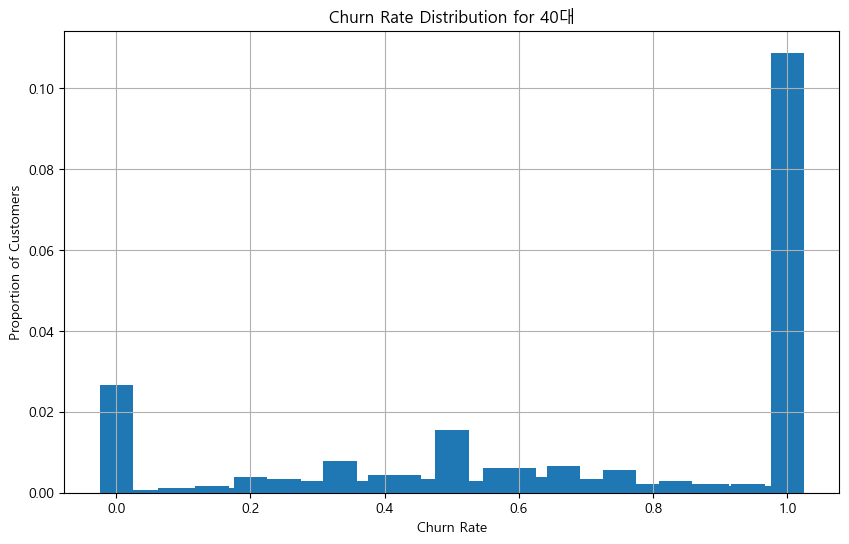

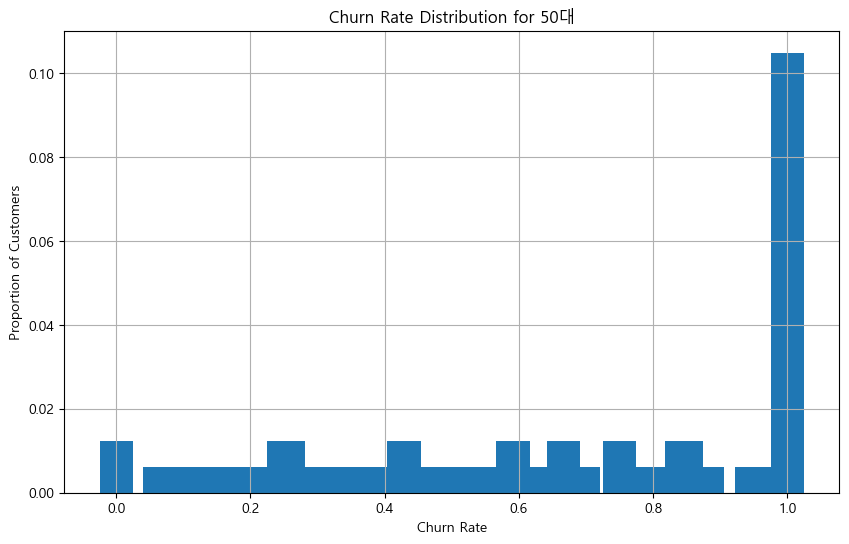

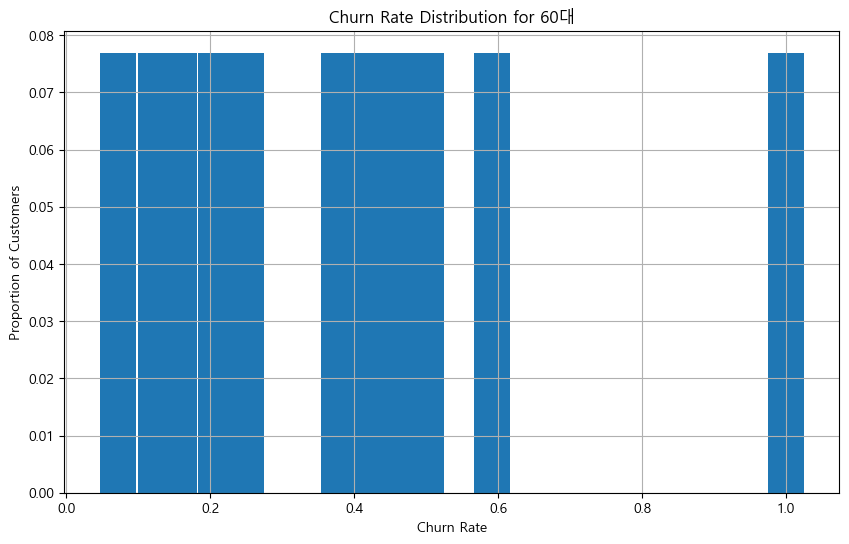

In [39]:
# 연령대 그룹을 반복하면서 각 그룹의 이탈률 분포를 시각화합니다.
for age_group in df_final['age_group'].sort_values().unique():
    subset = df_final_with_churn_rate[df_final_with_churn_rate['age_group'] == age_group]
    
    # 각 이탈률에 해당하는 유니크한 고객 수를 계산합니다.
    churn_rate_counts = subset.groupby('churn_rate')['customer_id'].nunique()

    # 각 그룹의 전체 고객 수를 계산합니다.
    total_customers = subset['customer_id'].nunique()

    # 고객 수의 비율을 계산하여 히스토그램을 그립니다.
    plt.figure(figsize=(10,6))
    plt.bar(churn_rate_counts.index, churn_rate_counts / total_customers, width=0.05)
    
    plt.title(f'Churn Rate Distribution for {age_group}')
    plt.xlabel('Churn Rate')
    plt.ylabel('Proportion of Customers')
    plt.grid(True)
    plt.show()


